# The Zen of Python

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [17]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Setting up Quandl for your environment

In [ ]:
import pandas
pandas.__version__

'1.0.5'

# Plotting your first chart

## Retrieving dataset from Quandl

In [2]:
!pip install quandl

In [3]:
import quandl

# Replace with your own Quandl API key
QUANDL_API_KEY = 'yz7qGzikAuQL9wn7rrX-' 
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN')

In [4]:
df.head()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2015-11-20,18.18,18.43,18.000,18.35,38392898.0,7.003281e+08
2015-11-23,18.45,18.70,18.215,18.61,3352514.0,6.186446e+07
2015-11-24,18.70,18.80,18.370,18.80,4871901.0,8.994087e+07
2015-11-25,18.85,19.50,18.770,19.45,4802607.0,9.153862e+07
2015-11-26,19.48,19.67,19.410,19.43,1648481.0,3.220713e+07


In [5]:
df.tail()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2020-07-14,8.020,8.314,8.006,8.210,4821580.0,39467133.0
2020-07-15,8.320,8.414,8.050,8.348,4520672.0,37408978.0
2020-07-16,8.308,8.490,8.236,8.452,3866405.0,32357506.0
2020-07-17,8.450,8.480,8.256,8.396,3911783.0,32690718.0
2020-07-20,8.308,8.350,8.180,8.220,4440994.0,36560044.0


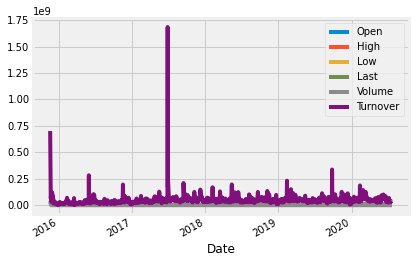

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot();

## Plotting a price and volume chart

In [7]:
prices = df['Last']
volumes = df['Volume']

In [8]:
prices.head()

Date
2015-11-20    18.35
2015-11-23    18.61
2015-11-24    18.80
2015-11-25    19.45
2015-11-26    19.43
Name: Last, dtype: float64

In [9]:
volumes.tail()

Date
2020-07-14    4821580.0
2020-07-15    4520672.0
2020-07-16    3866405.0
2020-07-17    3911783.0
2020-07-20    4440994.0
Name: Volume, dtype: float64

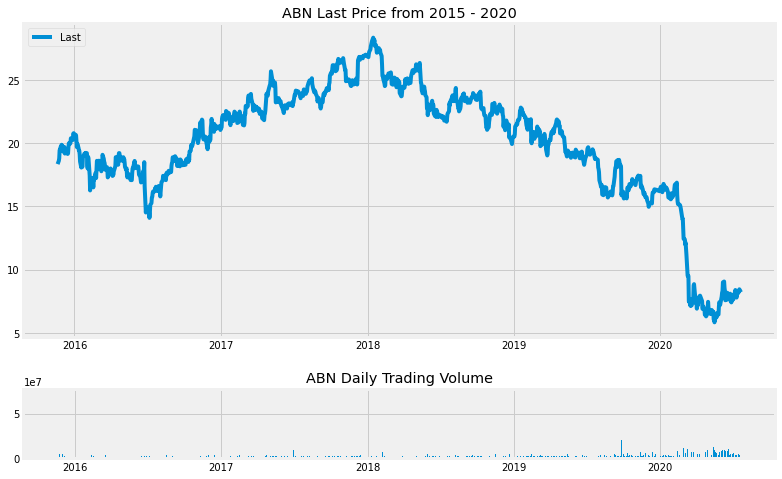

In [19]:
# The top plot consisting of dailing closing prices
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Last')
plt.title('ABN Last Price from 2015 - 2020')
plt.legend(loc=2)

# The bottom plot consisting of daily trading volume
bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title('ABN Daily Trading Volume')

plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)

## Plotting a candlestick chart

In [13]:
!pip install mpl_finance

In [14]:
%matplotlib inline
import quandl
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = QUANDL_API_KEY
df_subset = quandl.get('EURONEXT/ABN', 
                       start_date='2018-07-01', 
                       end_date='2018-07-31')

df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Last']]
df_ohlc.head()

,Date,Open,High,Low,Last
Date,,,,,
2018-07-02,736877.0,22.00,22.24,21.75,22.20
2018-07-03,736878.0,22.30,22.34,21.97,22.13
2018-07-04,736879.0,22.05,22.25,22.05,22.12
2018-07-05,736880.0,22.12,22.64,22.10,22.16
2018-07-06,736881.0,22.19,22.29,21.87,22.00


In [15]:
df_ohlc.values

array([[7.36877e+05, 2.20000e+01, 2.22400e+01, 2.17500e+01, 2.22000e+01],
       [7.36878e+05, 2.23000e+01, 2.23400e+01, 2.19700e+01, 2.21300e+01],
       [7.36879e+05, 2.20500e+01, 2.22500e+01, 2.20500e+01, 2.21200e+01],
       [7.36880e+05, 2.21200e+01, 2.26400e+01, 2.21000e+01, 2.21600e+01],
       [7.36881e+05, 2.21900e+01, 2.22900e+01, 2.18700e+01, 2.20000e+01],
       [7.36884e+05, 2.21500e+01, 2.22000e+01, 2.19600e+01, 2.21100e+01],
       [7.36885e+05, 2.21900e+01, 2.21900e+01, 2.19300e+01, 2.19900e+01],
       [7.36886e+05, 2.19400e+01, 2.19800e+01, 2.17300e+01, 2.17900e+01],
       [7.36887e+05, 2.19200e+01, 2.19300e+01, 2.17100e+01, 2.18100e+01],
       [7.36888e+05, 2.18600e+01, 2.19500e+01, 2.16900e+01, 2.18100e+01],
       [7.36891e+05, 2.18000e+01, 2.20900e+01, 2.17000e+01, 2.19000e+01],
       [7.36892e+05, 2.18200e+01, 2.18900e+01, 2.16100e+01, 2.17000e+01],
       [7.36893e+05, 2.17000e+01, 2.19600e+01, 2.15200e+01, 2.19300e+01],
       [7.36894e+05, 2.19400e+01, 2.23

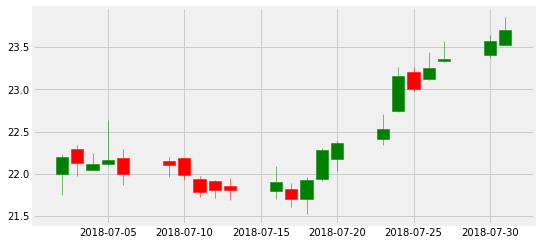

In [20]:
figure, ax = plt.subplots(figsize = (8,4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax, 
                 df_ohlc.values, 
                 width=0.8, 
                 colorup='green', 
                 colordown='red')
plt.show()

ANOTHER METHOD DNN

In [23]:
# OHLC chart of 2008
trace = go.Ohlc(x=df_ohlc.index,
                open=df_ohlc.Open,
                high=df_ohlc.High,
                low=df_ohlc.Low,
                close=df_ohlc.Last)
data = [trace]
iplot(data, filename='simple_ohlc')


In [24]:
# OHLC chart of 2008
trace = go.Candlestick(x=df_ohlc.index,
                open=df_ohlc.Open,
                high=df_ohlc.High,
                low=df_ohlc.Low,
                close=df_ohlc.Last)
data = [trace]
iplot(data, filename='simple_ohlc')

# Performing Financial Analytics

## Plotting returns

One of the classic measures of security performance is its
returns over a prior period. A simple method for calculating
returns in pandas is pct_change, where the percentage change from
the previous row is computed for every row in the DataFrame.
In the following example, we use ABN stock data to plot a
simple graph of daily percentage returns:

In [26]:
%matplotlib inline
import quandl

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')
df.head()

,Last
Date,
2015-11-20,18.35
2015-11-23,18.61
2015-11-24,18.80
2015-11-25,19.45
2015-11-26,19.43


In [27]:
daily_changes = df.pct_change(periods=1)
daily_changes.head()
# (day 2 - day 1) /day 1

,Last
Date,
2015-11-20,NaN
2015-11-23,0.014169
2015-11-24,0.010210
2015-11-25,0.034574
2015-11-26,-0.001028


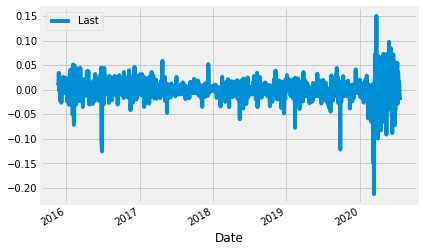

In [28]:
daily_changes.plot();

## Plotting cummulative returns

To find out how our portfolio has performed, we can sum its
returns over a period of time. The cumsum method of pandas
returns the cumulative sum over a DataFrame.

In [29]:
daily_changes

,Last
Date,
2015-11-20,NaN
2015-11-23,0.014169
2015-11-24,0.010210
2015-11-25,0.034574
2015-11-26,-0.001028
...,...
2020-07-14,0.007362
2020-07-15,0.016809
2020-07-16,0.012458


In [30]:
df_cumsum = daily_changes.cumsum()
df_cumsum
# Cái sau bằng tổng tất cả cái trước

,Last
Date,
2015-11-20,NaN
2015-11-23,0.014169
2015-11-24,0.024379
2015-11-25,0.058953
2015-11-26,0.057925
...,...
2020-07-14,-0.514505
2020-07-15,-0.497696
2020-07-16,-0.485238


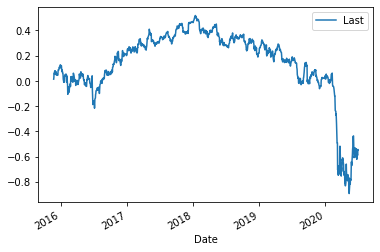

In [ ]:
df_cumsum.plot();

## Plotting Histograms

Histograms tell us how distributed data is. In this example, we
are interested in how distributed the daily returns of ABN are.
We use the hist() method on a DataFrame with a bin size of 50

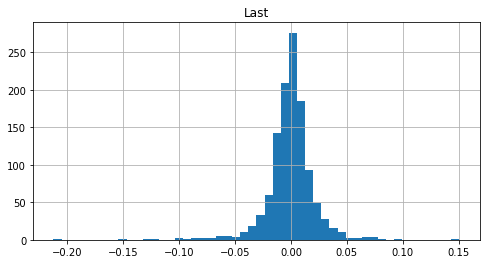

In [ ]:
daily_changes.hist(bins=50, figsize=(8, 4));

In [ ]:
daily_changes.describe()

,Last
count,1175.000000
mean,-0.000467
std,0.021836
min,-0.212453
25%,-0.009147
50%,0.000274
75%,0.009149
max,0.150552


From the histogram, the returns tend to be distributed about
the mean of 0.0, or 0.000499 to be exact. Besides this miniscule
skew to the right, the data appears fairly symmetrical and
normally distributed. The standard deviation is 0.016701. The
percentiles tell us that 25% of the points fall below -0.007992,
50% below 0.000584, and 75% below 0.008777.

## Plotting volatility

One way of analyzing the distribution of returns is measuring
its standard deviation. Standard deviation is a measure of
dispersion around the mean. A high standard deviation value
for past returns indicates a high historical volatility of stock
price movement.

The rolling() method of pandas helps us to visualize specific time
series operations over a period of time. To calculate standard
deviations of the percentage change of returns in our
computed ABN dataset, we use the std() method, which returns
a DataFrame or Series object that can be used to plot a chart.
The following example illustrates this:

In [ ]:
df.head()

,Last
Date,
2015-11-20,18.35
2015-11-23,18.61
2015-11-24,18.80
2015-11-25,19.45
2015-11-26,19.43


In [ ]:
df_filled = df.asfreq('D', method='ffill')
df_filled.head()

,Last
Date,
2015-11-20,18.35
2015-11-21,18.35
2015-11-22,18.35
2015-11-23,18.61
2015-11-24,18.80


In [ ]:
df_returns = df_filled.pct_change()
df_returns.head(32)

,Last
Date,
2015-11-20,NaN
2015-11-21,0.000000
2015-11-22,0.000000
2015-11-23,0.014169
2015-11-24,0.010210
2015-11-25,0.034574
2015-11-26,-0.001028
2015-11-27,0.011323
2015-11-28,0.000000


In [ ]:
df_std = df_returns.rolling(window=30, min_periods=30).std()
df_std[:32]
# stdev 30 first data

,Last
Date,
2015-11-20,NaN
2015-11-21,NaN
2015-11-22,NaN
2015-11-23,NaN
2015-11-24,NaN
2015-11-25,NaN
2015-11-26,NaN
2015-11-27,NaN
2015-11-28,NaN


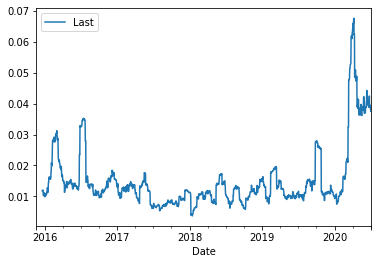

In [ ]:
df_std.plot();

## Quantile-Quantile Plot

A Q-Q (quantile-quantile) plot is a probability distribution
plot, where the quantiles of two distributions are plotted
against each other. If the distributions are linearly related, the
points in the Q-Q plot will lie along a line. Compared to
histograms, Q-Q plots help us to visualize points that lie
outside the line for positive and negative skews, as well as
excess kurtosis.

In [ ]:
%matplotlib inline
import quandl
from scipy import stats
from scipy.stats import probplot

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')
daily_changes = df.pct_change(periods=1).dropna()
daily_changes

,Last
Date,
2015-11-23,0.014169
2015-11-24,0.010210
2015-11-25,0.034574
2015-11-26,-0.001028
2015-11-27,0.011323
...,...
2020-06-29,0.043947
2020-06-30,-0.010072
2020-07-01,-0.001826


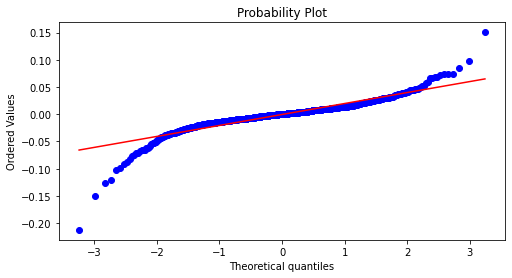

In [ ]:
figure = plt.figure(figsize=(8,4))
ax = figure.add_subplot(111)
stats.probplot(daily_changes['Last'], dist='norm', plot=ax)
plt.show();

When all points fall exactly along the red line, the distribution
of data implies perfect correspondences to a normal
distribution. Most of our data is close to being perfectly
correlated between quantiles -2 and +2. Outside this range,
there begin to be differences in correlation of the distribution,
with more negative skews at the tails

## Downloading multiple time series data

In [ ]:
%matplotlib inline
import quandl

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get(['EURONEXT/ABN.4', 
                 'EURONEXT/SANTA.4', 
                 'EURONEXT/KA.4'], 
                collapse='monthly', 
                start_date='2016-01-01', 
                end_date='2017-12-31')
df.head()

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last,EURONEXT/KA - Last
Date,,,
2016-01-31,19.240,3.94,9.850
2016-02-29,18.240,3.67,10.080
2016-03-31,18.005,3.95,10.115
2016-04-30,18.670,4.50,9.091
2016-05-31,18.305,4.36,9.000


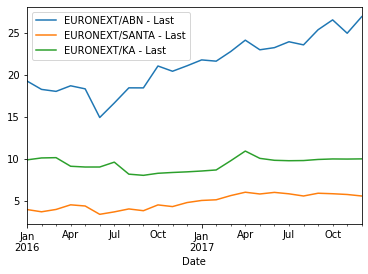

In [ ]:
df.plot();

## Displaying the Correlation Matrix


Correlation is a statistical association of how closely two
variables have a linear relationship with each other. We can
perform a correlation calculation on the returns of two time
series datasets to give us a value between -1 and 1. A
correlation value of 0 indicates that the returns of the two
time series have no relation to each other. A high correlation
value close to 1 indicates that the returns of the two time
series data tend to move together. A low value close to -1
indicates that returns tend to move inversely in relation to
each other

In [ ]:
df.pct_change().corr()

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last,EURONEXT/KA - Last
EURONEXT/ABN - Last,1.000000,0.809824,0.096238
EURONEXT/SANTA - Last,0.809824,1.000000,0.058095
EURONEXT/KA - Last,0.096238,0.058095,1.000000


## Plotting Correlations

In [ ]:
%matplotlib inline
import quandl

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get(['EURONEXT/ABN.4', 'EURONEXT/SANTA.4'], 
                start_date='2016-01-01', 
                end_date='2017-12-31')
df.head()

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last
Date,,
2016-01-04,20.670,4.43
2016-01-05,20.630,4.38
2016-01-06,20.130,4.29
2016-01-07,19.695,4.17
2016-01-08,19.970,4.16


In [ ]:
df_filled = df.asfreq('D', method='ffill')
df_filled.head()

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last
Date,,
2016-01-04,20.670,4.43
2016-01-05,20.630,4.38
2016-01-06,20.130,4.29
2016-01-07,19.695,4.17
2016-01-08,19.970,4.16


In [ ]:
daily_changes= df_filled.pct_change()
daily_changes.head()

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last
Date,,
2016-01-04,NaN,NaN
2016-01-05,-0.001935,-0.011287
2016-01-06,-0.024237,-0.020548
2016-01-07,-0.021610,-0.027972
2016-01-08,0.013963,-0.002398


In [ ]:
daily_changes.tail()

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last
Date,,
2017-12-25,0.000000,0.000000
2017-12-26,0.000000,0.000000
2017-12-27,0.004277,0.025000
2017-12-28,-0.002037,-0.033101
2017-12-29,-0.001855,0.000000


In [ ]:
abn_returns = daily_changes['EURONEXT/ABN - Last']
santa_returns = daily_changes['EURONEXT/SANTA - Last']

In [ ]:
df_filled.shape

(726, 2)

In [ ]:
window = int(len(df_filled.index)/2)
window

363

In [ ]:
 abn_returns.rolling(window=window, min_periods=window)

Rolling [window=363,min_periods=363,center=False,axis=0]

In [ ]:
df_corrs = abn_returns\
    .rolling(window=window, min_periods=window)\
    .corr(other=santa_returns)\
    .dropna()
df_corrs

Date
2017-01-01    0.356024
2017-01-02    0.356897
2017-01-03    0.356899
2017-01-04    0.354519
2017-01-05    0.354753
                ...   
2017-12-25    0.263851
2017-12-26    0.264849
2017-12-27    0.262877
2017-12-28    0.263144
2017-12-29    0.263138
Freq: D, Length: 363, dtype: float64

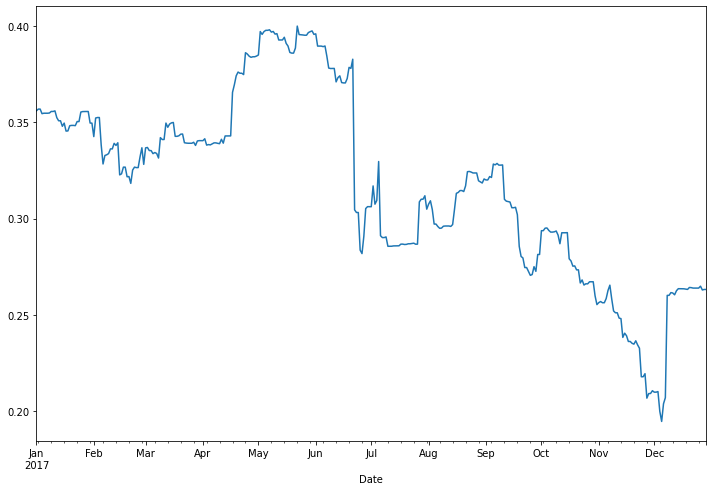

In [ ]:
df_corrs.plot(figsize=(12, 8));

The parameter window indicates we will perform a
one-year rolling correlation. The min_periods parameter indicates
that correlation will be calculated when only the full sample
size is present for calculation. In this case, there are no correlation values for the first year in the df_corrs dataset.
Finally, the plot() command displays the chart of one-year
rolling correlations of daily returns throughout the year of
2017

## Simple moving averages


A common technical indicator for time series data analysis is
moving averages. The mean() method can be used to compute
the mean of values for a given window in the rolling()
command. For example, a 5-day Simple Moving Average
(SMA) is the average of prices for the last five trading days,
computed daily over a time period. Similarly, we can also
compute a longer term 30-day simple moving average. These
two moving averages can be used together to generate
crossover signals

In [ ]:
%matplotlib inline
import quandl
import pandas as pd

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')
df.head()

,Last
Date,
2015-11-20,18.35
2015-11-23,18.61
2015-11-24,18.80
2015-11-25,19.45
2015-11-26,19.43


In [ ]:
df_filled = df.asfreq('D', method='ffill')
df_filled.head()

,Last
Date,
2015-11-20,18.35
2015-11-21,18.35
2015-11-22,18.35
2015-11-23,18.61
2015-11-24,18.80


In [ ]:
df_last = df_filled['Last']
series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()
df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma

,short,long
Date,,
2015-11-20,NaN,NaN
2015-11-21,NaN,NaN
2015-11-22,NaN,NaN
2015-11-23,NaN,NaN
2015-11-24,18.4920,NaN
...,...,...
2020-06-29,7.5496,7.958667
2020-06-30,7.5328,7.973867
2020-07-01,7.5796,7.972400


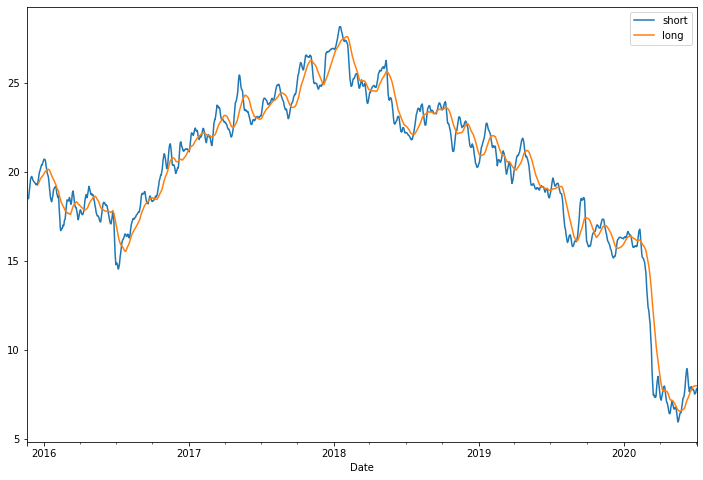

In [ ]:
df_sma.plot(figsize=(12, 8));

## Exponential Moving Average


Another approach in the calculation of moving averages is the
Exponential Moving Average (EMA). Recall that the
simple moving average assigns equal weight to prices within a
window period. However, in EMA, the most recent prices are
assigned a higher weight than older prices. This weight is
assigned on an exponential basis.

In [ ]:
%matplotlib inline
import quandl
import pandas as pd

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')
df.head()

,Last
Date,
2015-11-20,18.35
2015-11-23,18.61
2015-11-24,18.80
2015-11-25,19.45
2015-11-26,19.43


In [ ]:
df_filled = df.asfreq('D', method='ffill')
df_filled.head()

,Last
Date,
2015-11-20,18.35
2015-11-21,18.35
2015-11-22,18.35
2015-11-23,18.61
2015-11-24,18.80


In [ ]:
df_last = df_filled['Last']

series_short = df_last.ewm(span=5).mean()
series_long = df_last.ewm(span=30).mean()
series_long

Date
2015-11-20    18.350000
2015-11-21    18.350000
2015-11-22    18.350000
2015-11-23    18.421639
2015-11-24    18.507726
                ...    
2020-06-29     7.678563
2020-06-30     7.677752
2020-07-01     7.676091
2020-07-02     7.697375
2020-07-03     7.714319
Freq: D, Name: Last, Length: 1688, dtype: float64

In [ ]:
df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.head()

,short,long
Date,,
2015-11-20,18.350000,18.350000
2015-11-21,18.350000,18.350000
2015-11-22,18.350000,18.350000
2015-11-23,18.458000,18.421639
2015-11-24,18.589289,18.507726


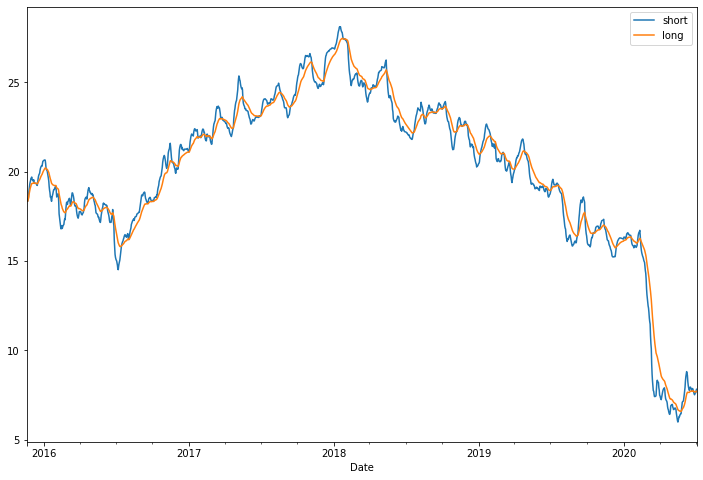

In [ ]:
df_sma.plot(figsize=(12, 8));

The chart patterns for the SMA and EMA are largely the same.
Since EMAs place a higher weighting on recent data than on
older data, they are more reactive to price changes than SMAs
are.